### Question 1 : 

Implement a program to segment an image
- By calculating a threshold setting using the histogram of brightness values.
- Using adaptive thresholding
- Using watershed algorithm

Segmenting an image refers to the process of dividing an image into multiple segments or regions based on certain criteria or features. The goal of image segmentation is to simplify the representation of an image or to make it more meaningful for analysis. Each segment or region typically corresponds to a specific object, region of interest, or class within the image.

`Import the required libraries`

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

`Function to display the images`

In [2]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

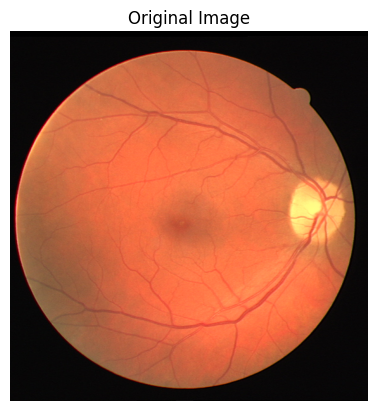

In [3]:
image = cv2.imread('Images/medical_image.png') # BGR
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # RGB
display(image,'Original Image')

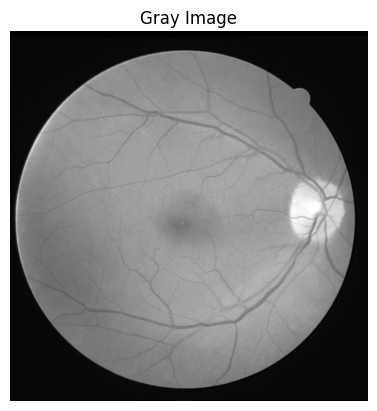

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
display(gray_image,'Gray Image')

`Histograms`

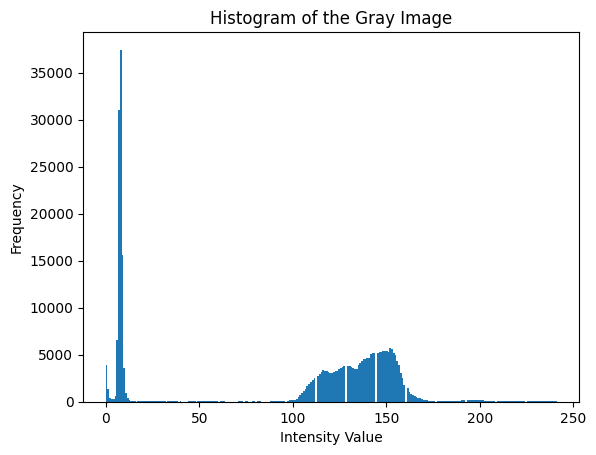

In [5]:
plt.hist(gray_image.ravel(),bins=256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Gray Image')
plt.show()

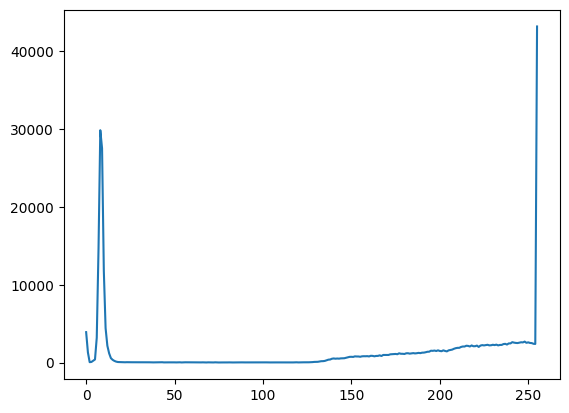

In [6]:
plt.plot(cv2.calcHist([image],[0], None, [256], [0,256]))

In [7]:
flattened_img = image.reshape((-1,3)) 
image.shape, flattened_img.shape

((584, 565, 3), (329960, 3))

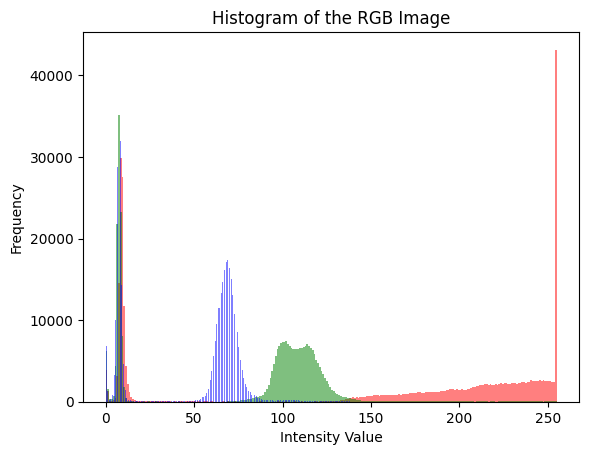

In [8]:
plt.hist(flattened_img[:,0],bins=256,color='red',alpha=0.5)
plt.hist(flattened_img[:,1],bins=256,color='green',alpha=0.5)
plt.hist(flattened_img[:,2],bins=256,color='blue',alpha=0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram of the RGB Image')
plt.show()

`Segmentation using threshold setting`

In [9]:
threshold_value = 93
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

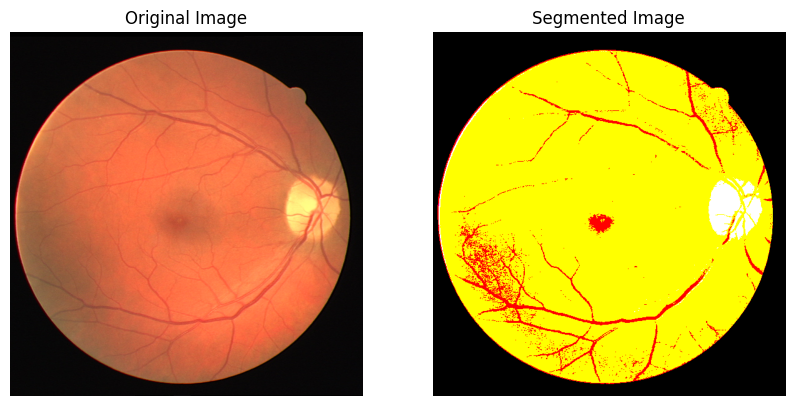

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
display(image,'Original Image')

plt.subplot(1,2,2)
display(binary_image,'Segmented Image')

plt.show()

`Segmentation using Adaptive Thresholding`

In [11]:
block_size = 21
c_value = 2     

adaptive_thresholded_gray_image_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c_value)
adaptive_thresholded_gray_image_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c_value)

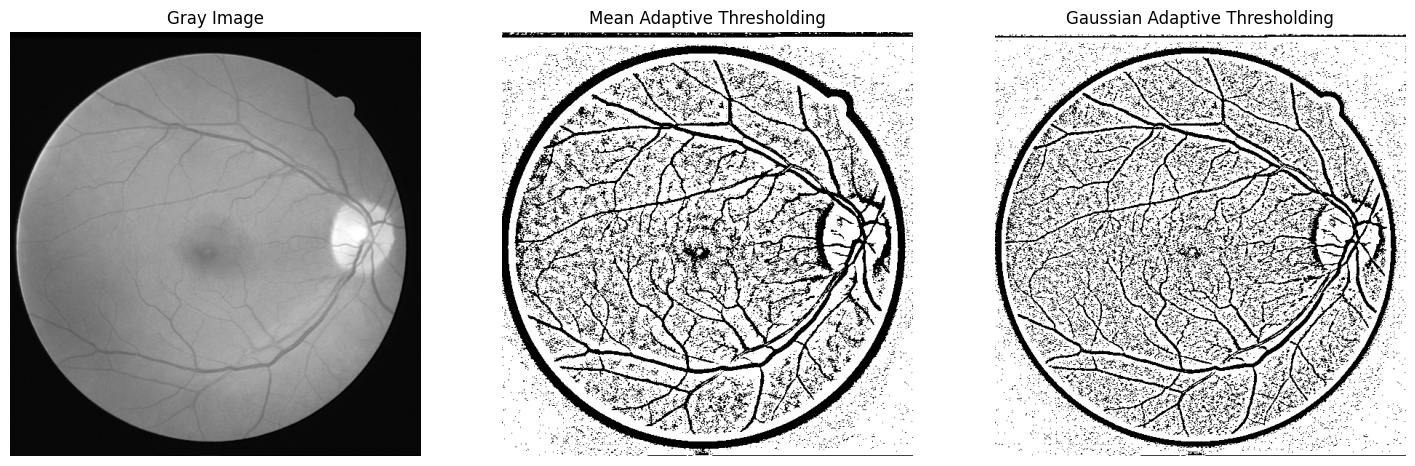

In [12]:
plt.figure(figsize=(18,10))

plt.subplot(1,3,1)
display(gray_image,'Gray Image')

plt.subplot(1,3,2)
display(adaptive_thresholded_gray_image_mean,'Mean Adaptive Thresholding')

plt.subplot(1,3,3)
display(adaptive_thresholded_gray_image_gaussian,'Gaussian Adaptive Thresholding')

plt.show()

`Segmentation using Watershed Algorithm`

In [13]:
# Apply thresholding 
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations to remove noise and smooth the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=4)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.19 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for the watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm (Add one to all labels so that sure background is not 0, but 1)
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark watershed boundaries with red color

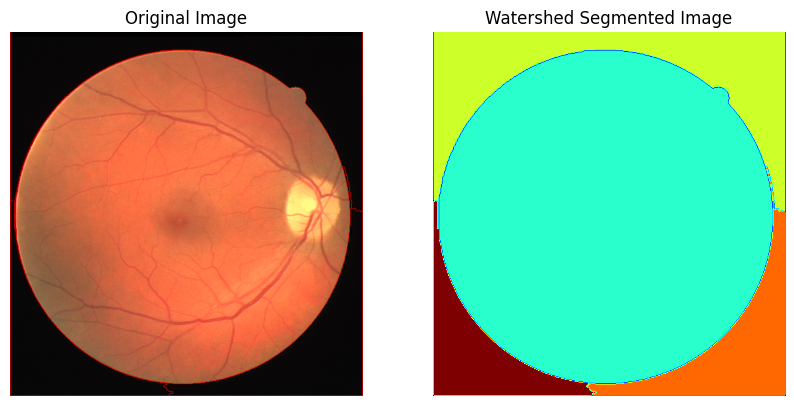

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(121) 
display(image,'Original Image')

plt.subplot(122)
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmented Image')
plt.axis('off')

plt.show()

### Question 2 :

Try to apply the morphological transform
- erosion and dilation with a circular structuring element
- erosion and dilation with a square structuring element
- closing and opening with a cross shaped structuring element

`Circle Kernel`

In [11]:
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 

erosion_circle = cv2.erode(gray_image, circle_kernel, iterations=2)
dilation_circle = cv2.dilate(gray_image, circle_kernel, iterations=1)

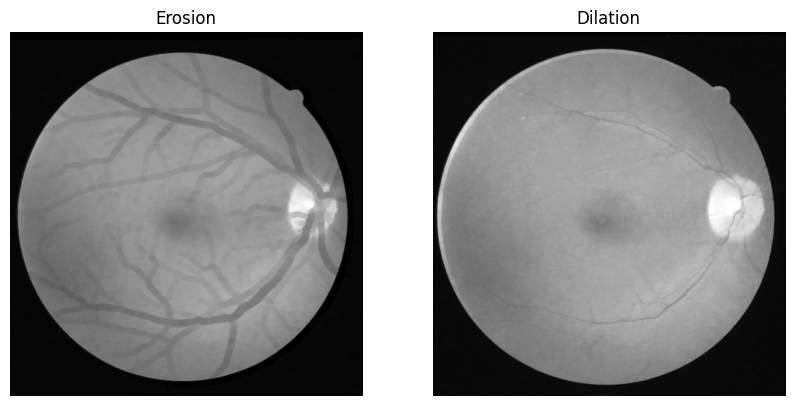

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(121)
display(erosion_circle,'Erosion')

plt.subplot(122)
display(dilation_circle,'Dilation')

plt.show()

`Square Kernel`

In [17]:
# square_kernel = np.ones((5, 5), np.uint8)
square_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

erosion_square = cv2.erode(gray_image, square_kernel, iterations=2)
dilation_square = cv2.dilate(gray_image, square_kernel, iterations=1)

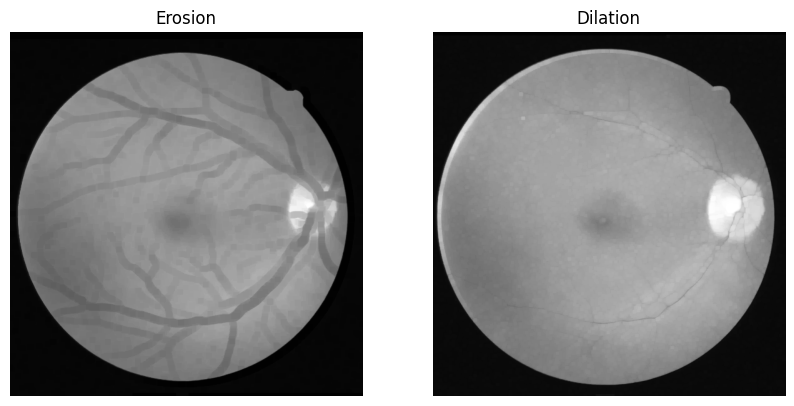

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(121)
display(erosion_square,'Erosion')

plt.subplot(122)
display(dilation_square,'Dilation')

plt.show()

`Cross Kernel`

In [20]:
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) 

closing_cross = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, cross_kernel)
opening_cross = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, cross_kernel)

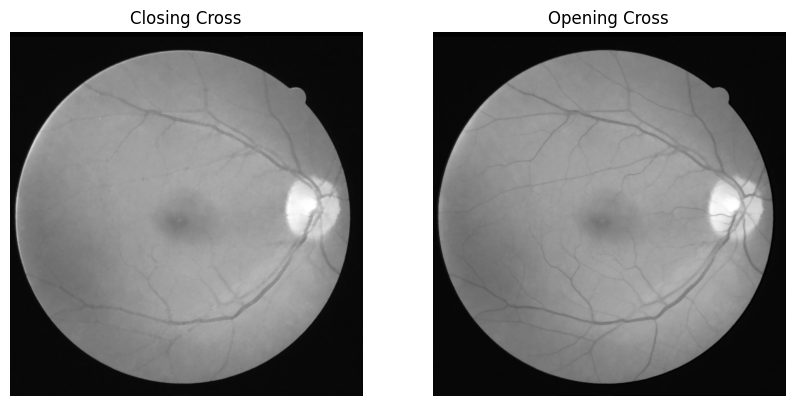

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(121)
display(closing_cross,'Closing Cross')

plt.subplot(122)
display(opening_cross,'Opening Cross')

plt.show()